In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/Aaryant31/DeepLearning_Practice/main/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [5]:
#cols_to_norm =diabetes[['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']]
cols_to_norm =['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [6]:
cols_to_norm 

['Number_pregnant',
 'Glucose_concentration',
 'Blood_pressure',
 'Triceps',
 'Insulin',
 'BMI',
 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
#from sklearn.preprocessing import MinMaxScaler

In [10]:
#scaler = MinMaxScaler()

In [11]:
#scaler.fit(cols_to_norm)

In [12]:
#cols_to_norm=scaler.transform(cols_to_norm)

In [13]:
#cols_to_norm = pd.DataFrame(cols_to_norm,columns=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree'])

In [14]:
#cols_to_norm.head()

### Feature Columns

In [15]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [16]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [17]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

<AxesSubplot:>

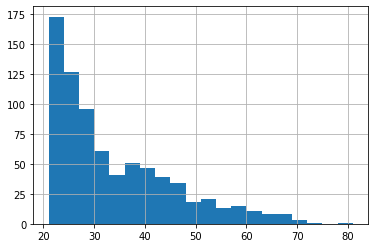

In [20]:
diabetes['Age'].hist(bins=20)

In [26]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [27]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [28]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [30]:
diabetes.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [31]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    float64
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [32]:
x_data = diabetes.drop('Class',axis=1)

In [33]:
labels = diabetes['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model

In [39]:
model= tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ULTIMA~1\\AppData\\Local\\Temp\\tmp1abs4jyd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


C:\Users\Ultimatrix\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ULTIMA~1\AppData\Local\Temp\tmp1abs4jyd\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 277.369
INFO:tensorflow:loss = 6.528928, step = 101 (0.349 sec)
INFO:tensorflow:global_step/sec: 530.733
INFO:tensorflow:loss = 5.8280573, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 586.388
INFO:tensorflow:loss = 5.7902474, step = 301 (0.172 sec)
INFO:tensorflow:global_step/sec: 569.699
INFO:tensorflow:loss = 5.5237346, step = 401 (0.175 sec)
INFO:tensorflow:global_st

## Evaluation

In [42]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [43]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


C:\Users\Ultimatrix\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-20T21:31:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmp1abs4jyd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.71702s
INFO:tensorflow:Finished evaluation at 2021-11-20-21:31:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7362205, accuracy_baseline = 0.65748036, auc = 0.78773487, auc_precision_recall = 0.6323185, average_loss = 0.52901345, global_step = 1000, label/mean = 0.34251967, loss = 5.1680546, precision = 0.6351351, prediction/mean = 0.35313687, recall = 0.54022986
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ULTIMA~1\AppData\Local\Te

In [44]:
results


{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78773487,
 'auc_precision_recall': 0.6323185,
 'average_loss': 0.52901345,
 'label/mean': 0.34251967,
 'loss': 5.1680546,
 'precision': 0.6351351,
 'prediction/mean': 0.35313687,
 'recall': 0.54022986,
 'global_step': 1000}

### Prediction

In [46]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [47]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [48]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmp1abs4jyd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.08778942], dtype=float32),
  'logistic': array([0.52193326], dtype=float32),
  'probabilities': array([0.4780667 , 0.52193326], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.46233785], dtype=float32),
  'logistic': array([0.6135686], dtype=float32),
  'probabilities': array([0.38643137, 0.61356866], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5085716], dtype=float32),
  'logistic': array([0.37552845], dtype=float32),
  'probabilities': array([0.6244716 , 0.37552845], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

# DNN Classifier

In [50]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ULTIMA~1\\AppData\\Local\\Temp\\tmpj9umjepa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
dnn_model.train(input_fn=input_func,steps=2000) # error ## we haveto do embedding for categorical features

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [54]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [55]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [56]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [57]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ULTIMA~1\\AppData\\Local\\Temp\\tmpbvs78wvy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [58]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ULTIMA~1\AppData\Local\Temp\tmpbvs78wvy\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.9187455, step = 1
INFO:tensorflow:global_step/sec: 356.652
INFO:tensorflow:loss = 5.110217, step = 101 (0.281 sec)
INFO:tensorflow:global_step/sec: 521.327
INFO:tensorflow:loss = 7.4159794, step = 201 (0.192 sec)
INFO:tensorflow:global_step/sec: 581.955
INFO:tensorflow:loss = 3.8680024, step = 301 (0.172 sec)
INFO:tensorflow:global_step/sec: 596.921
INFO:tensorf

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [60]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-20T21:46:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmpbvs78wvy\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.49081s
INFO:tensorflow:Finished evaluation at 2021-11-20-21:46:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72834647, accuracy_baseline = 0.65748036, auc = 0.8305458, auc_precision_recall = 0.68785346, average_loss = 0.5124716, global_step = 1000, label/mean = 0.34251967, loss = 5.0064535, precision = 0.575, prediction/mean = 0.45034483, recall = 0.79310346
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ULTIMA~1\AppData\Local\Temp\tmpbvs78wvy\model.ckpt-1000


{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8305458,
 'auc_precision_recall': 0.68785346,
 'average_loss': 0.5124716,
 'label/mean': 0.34251967,
 'loss': 5.0064535,
 'precision': 0.575,
 'prediction/mean': 0.45034483,
 'recall': 0.79310346,
 'global_step': 1000}